In [1]:
import pandas as pd

In [137]:
test_df =pd.read_csv(r"D:\Restaurant_Rating_Prediction\Restaurant\artifact\data_ingestion\2022-08-29-14-49-00\ingested_data\test\zomato.csv")

In [5]:
test_df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Kshera Sagar,No,No,3.9,0,Koramangala 1st Block,Quick Bites,NaN,"North Indian, Chinese",200,Dine-out,Koramangala 5th Block
1,Melt - Eden Park,Yes,Yes,4.0,347,JP Nagar,Casual Dining,"Tandoori Chicken, Biryani, Paneer Tikka, Chick...","North Indian, Chinese, Thai, Mughlai, Seafood","1,000",Buffet,JP Nagar
2,Sea Horse,No,No,3.4,9,JP Nagar,Casual Dining,NaN,"South Indian, Chinese",400,Delivery,Bannerghatta Road


In [10]:
count = test_df['location'].value_counts(ascending=False)

In [13]:
count_lessthan_300 = count[count<300]
count_lessthan_300

Koramangala 1st Block    257
Electronic City          243
Brigade Road             242
Bellandur                240
Koramangala 7th Block    230
                        ... 
Kengeri                    3
Langford Town              3
Yelahanka                  2
Uttarahalli                2
Nagarbhavi                 1
Name: location, Length: 79, dtype: int64

In [119]:


def handle(value):
    try:
        if value in count_lessthan_300 :
            return 'others'
        else:
            return value
    except Exception as e:
        print(str(e))

In [124]:
test_df['location'] = test_df['location'].apply(handle)

In [126]:
test_df['location'].unique()

array(['others', 'JP Nagar', 'Marathahalli', 'Bannerghatta Road', 'BTM',
       'HSR', 'Koramangala 5th Block', 'Jayanagar', 'Whitefield',
       'Indiranagar', nan], dtype=object)

In [146]:
from sqlite3 import DatabaseError


def handle(df:pd.DataFrame,threshold):
    try:
        count = df.value_counts()
        count_lesthan_threshold = count[count<threshold]
        for value in df:
            if value in count_lesthan_threshold:
                value = 'others'
            else:
                value = value
        return df
    except Exception as e:
        print(str(e))



In [149]:
test_df['location'] = handle(test_df['location'],300)

In [151]:
test_df['location'].unique()

array(['Koramangala 1st Block', 'JP Nagar',
       'Varthur Main Road, Whitefield', 'Marathahalli',
       'Bannerghatta Road', 'Sarjapur Road', 'BTM', 'Residency Road',
       'Malleshwaram', 'HSR', 'Ulsoor', 'Banashankari',
       'Koramangala 5th Block', 'Brigade Road', 'Ejipura',
       'Sahakara Nagar', 'Domlur', 'Jayanagar', 'Brookefield',
       'Jalahalli', 'Infantry Road', 'MG Road', 'Kammanahalli',
       'Whitefield', 'Bellandur', 'Basavanagudi', 'St. Marks Road',
       'HBR Layout', 'Koramangala 6th Block', 'Frazer Town',
       'Koramangala 4th Block', 'Electronic City',
       'Koramangala 2nd Block', 'Indiranagar', 'Kumaraswamy Layout',
       'Banaswadi', 'Rajajinagar', 'Shanti Nagar', 'Kalyan Nagar',
       'Koramangala 7th Block', 'Shivajinagar', 'Commercial Street',
       'Church Street', 'Basaveshwara Nagar', 'Lavelle Road',
       'Wilson Garden', 'Cunningham Road', 'Koramangala 3rd Block',
       'Vijay Nagar', 'City Market', 'Hosur Road', 'Seshadripuram',
     

In [138]:
test_df['rest_type'].value_counts()

Quick Bites                   3840
Casual Dining                 2017
Cafe                           729
Delivery                       515
Dessert Parlor                 472
                              ... 
Food Court, Beverage Shop        1
Bar, Quick Bites                 1
Quick Bites, Mess                1
Dessert Parlor, Sweet Shop       1
Lounge, Cafe                     1
Name: rest_type, Length: 85, dtype: int64

In [162]:
from Restaurant.util.util import handlecomma
test_df['approx_cost(for two people)'] = test_df['approx_cost(for two people)'].str.replace(",","")

In [164]:
from cgi import test


test_df['approx_cost(for two people)'] = pd.to_numeric(test_df['approx_cost(for two people)'])

In [172]:
test_df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [173]:
test_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Kshera Sagar,No,No,3.9,0,Koramangala 1st Block,Quick Bites,NaN,"North Indian, Chinese",200.0,Dine-out,Koramangala 5th Block
1,Melt - Eden Park,Yes,Yes,4.0,347,JP Nagar,Casual Dining,"Tandoori Chicken, Biryani, Paneer Tikka, Chick...","North Indian, Chinese, Thai, Mughlai, Seafood",1000.0,Buffet,JP Nagar
2,Sea Horse,No,No,3.4,9,JP Nagar,Casual Dining,NaN,"South Indian, Chinese",400.0,Delivery,Bannerghatta Road
3,CakeZone,Yes,No,3.9,33,"Varthur Main Road, Whitefield","Takeaway, Delivery",NaN,"Bakery, Desserts",200.0,Delivery,Whitefield
4,Shri Vishnu Grand,Yes,No,3.1,142,Marathahalli,Casual Dining,"Rava Idli, Tea, Coffee, Rava Dosa, Biryani, Ma...","North Indian, South Indian, Chinese",450.0,Delivery,Sarjapur Road


In [178]:
def handle(value):
    try:
        if value in count_lessthan_300 :
            return 'others'
        else:
            return value
    except Exception as e:
        print(str(e))

In [179]:
test_df['rest_type'] = test_df['rest_type'].apply(handle)

In [180]:
len(test_df['rest_type'].unique())

86

In [69]:
import pandas as pd
file_path = r"D:\Restaurant_Rating_Prediction\Restaurant\artifact\data_ingestion\2022-45-29-14-45-56\ingested_data\test\zomato.csv"
test_df = pd.read_csv(file_path)
from Restaurant.util.util import *

In [46]:
import numpy as np
def count(value):
    try:
        if type(value) == float:
            value = 0
            return value
        else:
            value = len(str(value).split(","))
            return value
    except Exception as e:
        print(str(e))

In [57]:
test_df['dish_liked'] = test_df['dish_liked'].apply(count)
test_df['cuisines'] = test_df['cuisines'].apply(count)
#test_df['approx_cost(for two people)'] = test_df['approx_cost(for two people)'].str.replace(",","")
test_df['approx_cost(for two people)'] = pd.to_numeric(test_df['approx_cost(for two people)'])
test_df['online_order'] = test_df['online_order'].astype('category')
test_df['book_table']= test_df['book_table'].astype('category')

In [36]:
schema_file_path = r"D:\Restaurant_Rating_Prediction\config\schema.yaml"
schema_file_content = read_yaml_file(file_path=schema_file_path)
schema_columns_info = schema_file_content['columns']
schema_columns_info

{'name': 'object',
 'online_order': 'category',
 'book_table': 'category',
 'rate': 'float64',
 'votes': 'int64',
 'location': 'object',
 'rest_type': 'object',
 'dish_liked': 'int64',
 'cuisines': 'int64',
 'approx_cost(for two people)': 'float64',
 'listed_in(type)': 'object',
 'listed_in(city)': 'object'}

In [58]:

for column in test_df.columns:
    if column in schema_columns_info.keys():
        test_df[column].astype(schema_columns_info[column])
test_df.dtypes

name                             object
online_order                   category
book_table                     category
rate                            float64
votes                             int64
location                         object
rest_type                        object
dish_liked                        int64
cuisines                          int64
approx_cost(for two people)     float64
listed_in(type)                  object
listed_in(city)                  object
dtype: object

In [54]:
test_df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
location                        object
rest_type                       object
dish_liked                       int64
cuisines                         int64
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [44]:
test_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Kshera Sagar,No,No,3.9,0,Koramangala 1st Block,Quick Bites,NaN,"North Indian, Chinese",200,Dine-out,Koramangala 5th Block
1,Melt - Eden Park,Yes,Yes,4.0,347,JP Nagar,Casual Dining,"Tandoori Chicken, Biryani, Paneer Tikka, Chick...","North Indian, Chinese, Thai, Mughlai, Seafood","1,000",Buffet,JP Nagar
2,Sea Horse,No,No,3.4,9,JP Nagar,Casual Dining,NaN,"South Indian, Chinese",400,Delivery,Bannerghatta Road
3,CakeZone,Yes,No,3.9,33,"Varthur Main Road, Whitefield","Takeaway, Delivery",NaN,"Bakery, Desserts",200,Delivery,Whitefield
4,Shri Vishnu Grand,Yes,No,3.1,142,Marathahalli,Casual Dining,"Rava Idli, Tea, Coffee, Rava Dosa, Biryani, Ma...","North Indian, South Indian, Chinese",450,Delivery,Sarjapur Road


In [92]:
test_df['dish_liked'].unique()

array([nan,
       'Tandoori Chicken, Biryani, Paneer Tikka, Chicken Curry, Plain Rice, Cheese Naan, Malaysian Noodles',
       'Rava Idli, Tea, Coffee, Rava Dosa, Biryani, Masala Dosa, Pav Bhaji',
       ...,
       'Burgers, Cheddar Cheese Balls, Peri Peri Chicken Steak, Pasta, Pizza, Fries, Peri Peri Chicken Burger',
       'Paneer Biryani, Naan',
       'Noodles, Jumbo Prawns, Lunch Buffet, Crispy Corn, Chicken Dim Sum, Brownie, Sea Food'],
      dtype=object)

In [174]:

import numpy as np
def count(value):
    try:
        if type(value) == float:
            value = 0
            return value
        else:
            value = len(str(value).split(","))
            return value
    except Exception as e:
        print(str(e))

In [5]:
test_df['cuisines'] = test_df['cuisines'].apply(count)

In [7]:
test_df['cuisines'].isnull().value_counts()

False    10344
Name: cuisines, dtype: int64

In [6]:
test_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Kshera Sagar,No,No,3.9,0,Koramangala 1st Block,Quick Bites,NaN,2,200,Dine-out,Koramangala 5th Block
1,Melt - Eden Park,Yes,Yes,4.0,347,JP Nagar,Casual Dining,"Tandoori Chicken, Biryani, Paneer Tikka, Chick...",5,"1,000",Buffet,JP Nagar
2,Sea Horse,No,No,3.4,9,JP Nagar,Casual Dining,NaN,2,400,Delivery,Bannerghatta Road
3,CakeZone,Yes,No,3.9,33,"Varthur Main Road, Whitefield","Takeaway, Delivery",NaN,2,200,Delivery,Whitefield
4,Shri Vishnu Grand,Yes,No,3.1,142,Marathahalli,Casual Dining,"Rava Idli, Tea, Coffee, Rava Dosa, Biryani, Ma...",3,450,Delivery,Sarjapur Road


In [8]:
test_df['dish_liked'] = test_df['dish_liked'].apply(count)

In [9]:
test_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Kshera Sagar,No,No,3.9,0,Koramangala 1st Block,Quick Bites,0,2,200,Dine-out,Koramangala 5th Block
1,Melt - Eden Park,Yes,Yes,4.0,347,JP Nagar,Casual Dining,7,5,"1,000",Buffet,JP Nagar
2,Sea Horse,No,No,3.4,9,JP Nagar,Casual Dining,0,2,400,Delivery,Bannerghatta Road
3,CakeZone,Yes,No,3.9,33,"Varthur Main Road, Whitefield","Takeaway, Delivery",0,2,200,Delivery,Whitefield
4,Shri Vishnu Grand,Yes,No,3.1,142,Marathahalli,Casual Dining,7,3,450,Delivery,Sarjapur Road


In [111]:
type(np.nan)

float

In [71]:
test_df['approx_cost(for two people)'] = test_df['approx_cost(for two people)'].str.replace(",","")
test_df['approx_cost(for two people)'] = pd.to_numeric(test_df['approx_cost(for two people)'])

In [11]:
test_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Kshera Sagar,No,No,3.9,0,Koramangala 1st Block,Quick Bites,0,2,200.0,Dine-out,Koramangala 5th Block
1,Melt - Eden Park,Yes,Yes,4.0,347,JP Nagar,Casual Dining,7,5,1000.0,Buffet,JP Nagar
2,Sea Horse,No,No,3.4,9,JP Nagar,Casual Dining,0,2,400.0,Delivery,Bannerghatta Road
3,CakeZone,Yes,No,3.9,33,"Varthur Main Road, Whitefield","Takeaway, Delivery",0,2,200.0,Delivery,Whitefield
4,Shri Vishnu Grand,Yes,No,3.1,142,Marathahalli,Casual Dining,7,3,450.0,Delivery,Sarjapur Road


In [148]:
df = test_df.drop(['name','rest_type','location','listed_in(type)','listed_in(city)'],axis=1)


In [13]:
df.head()

,online_order,book_table,rate,votes,dish_liked,cuisines,approx_cost(for two people)
0,No,No,3.9,0,0,2,200.0
1,Yes,Yes,4.0,347,7,5,1000.0
2,No,No,3.4,9,0,2,400.0
3,Yes,No,3.9,33,0,2,200.0
4,Yes,No,3.1,142,7,3,450.0


In [14]:
df['Rate'] = df['rate']

In [15]:
df.drop('rate',axis=1,inplace = True)

In [16]:
df.head()

,online_order,book_table,votes,dish_liked,cuisines,approx_cost(for two people),Rate
0,No,No,0,0,2,200.0,3.9
1,Yes,Yes,347,7,5,1000.0,4.0
2,No,No,9,0,2,400.0,3.4
3,Yes,No,33,0,2,200.0,3.9
4,Yes,No,142,7,3,450.0,3.1


In [17]:
df['online_order'].isnull().sum()

0

In [18]:
df['book_table'].isnull().sum()

0

In [19]:
df['votes'].isnull().sum()

0

In [20]:
df['dish_liked'].isnull().sum()

0

In [21]:
df['cuisines'].isnull().sum()

0

In [22]:
df['approx_cost(for two people)'].isnull().sum()

66

(array([5408., 3295.,  785.,  472.,  183.,   36.,   45.,   35.,   11.,
           8.]),
 array([  40.,  446.,  852., 1258., 1664., 2070., 2476., 2882., 3288.,
        3694., 4100.]),
 <BarContainer object of 10 artists>)

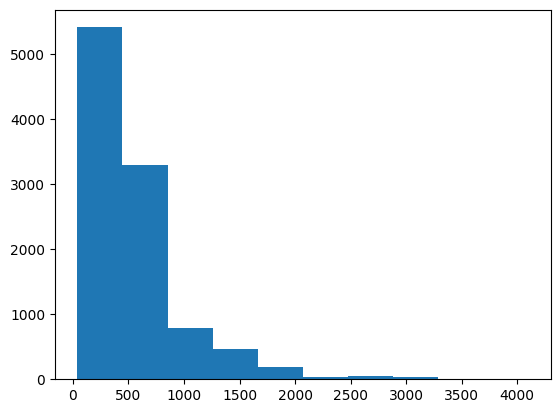

In [133]:
import matplotlib.pyplot as plt

plt.hist(df['approx_cost(for two people)'])

In [75]:
from sklearn.impute import SimpleImputer

simple = SimpleImputer(missing_values = np.nan,strategy = "median")
simple.fit(test_df[['approx_cost(for two people)']])

simple.transform(test_df[['approx_cost(for two people)']])

test_df['approx_cost(for two people)'].isnull().sum()

66

In [80]:
from statistics import median
median_ = df['approx_cost(for two people)'].median(skipna=True)
print(median_)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(median_)

400.0


In [81]:
df['approx_cost(for two people)'].isnull().sum()

0

In [142]:
#normal = np.log(df['approx_cost(for two people)'])

(array([   4.,  196.,  459., 1548., 3201., 2113., 1648.,  790.,  251.,
          68.]),
 array([3.68887945, 4.15186573, 4.61485201, 5.07783829, 5.54082457,
        6.00381085, 6.46679713, 6.92978341, 7.39276969, 7.85575597,
        8.31874225]),
 <BarContainer object of 10 artists>)

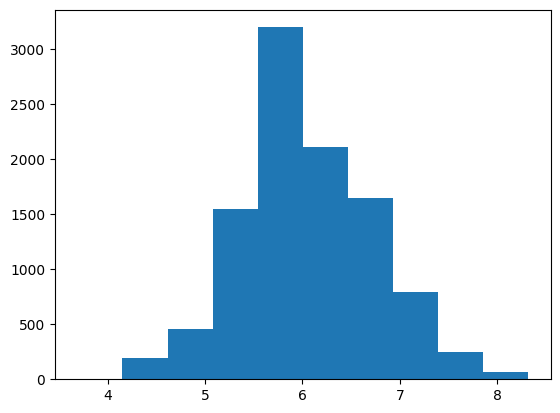

In [143]:
#plt.hist(normal)

(array([  12., 2487., 3566., 2424.,    0., 1210.,  383.,  137.,   80.,
          45.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

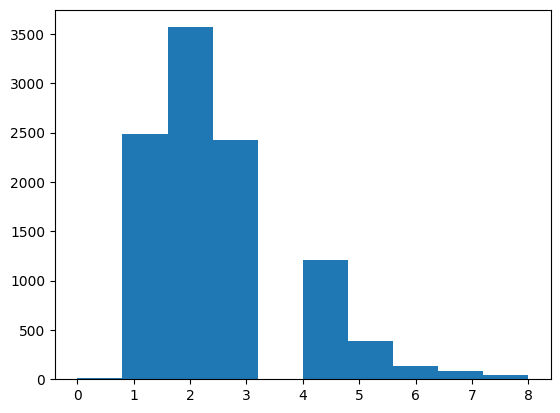

In [145]:
plt.hist(df['cuisines'])

In [146]:
df.head()

,online_order,book_table,votes,dish_liked,cuisines,approx_cost(for two people),Rate
0,No,No,0,0,2,200.0,3.9
1,Yes,Yes,347,7,5,1000.0,4.0
2,No,No,9,0,2,400.0,3.4
3,Yes,No,33,0,2,200.0,3.9
4,Yes,No,142,7,3,450.0,3.1


In [25]:
df.dtypes

online_order                    object
book_table                      object
votes                            int64
dish_liked                       int64
cuisines                         int64
approx_cost(for two people)    float64
Rate                           float64
dtype: object

In [26]:
df['online_order'] = df['online_order'].astype('category')

In [29]:
df['book_table'] = df['book_table'].astype('category')

In [30]:
df.dtypes

online_order                   category
book_table                     category
votes                             int64
dish_liked                        int64
cuisines                          int64
approx_cost(for two people)     float64
Rate                            float64
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x2a3228c2400>,
 'caps': [<matplotlib.lines.Line2D at 0x2a322895c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a3228c23c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2a3228956a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a322895128>],
 'means': []}

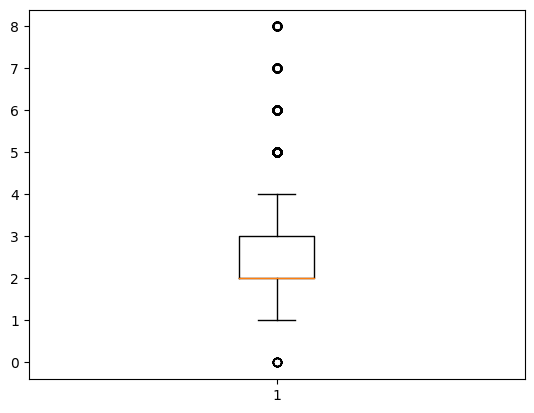

In [149]:
plt.boxplot(df['cuisines'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a3260675f8>,
 'caps': [<matplotlib.lines.Line2D at 0x2a326067b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a326067358>],
 'medians': [<matplotlib.lines.Line2D at 0x2a3261db128>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a326071438>],
 'means': []}

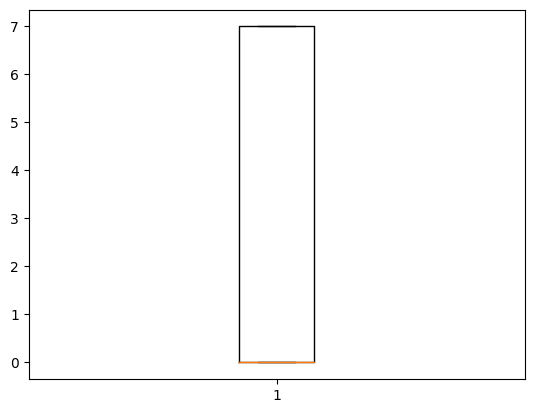

In [150]:
plt.boxplot(df['dish_liked'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a3260d10b8>,
 'caps': [<matplotlib.lines.Line2D at 0x2a3260df7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a3260df2e8>],
 'medians': [<matplotlib.lines.Line2D at 0x2a3260dfdd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a3260eb3c8>],
 'means': []}

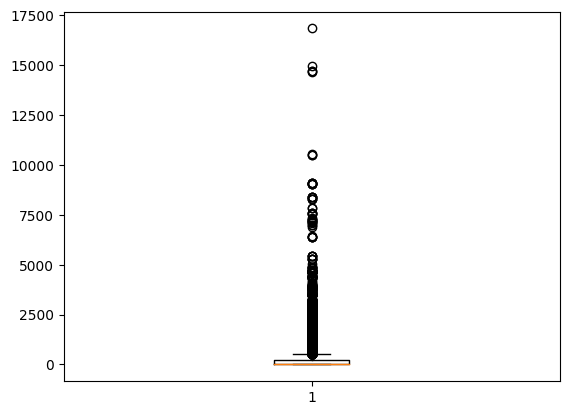

In [151]:
plt.boxplot(df['votes'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a326392a58>,
 'caps': [<matplotlib.lines.Line2D at 0x2a3262394a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a32622ac50>],
 'medians': [<matplotlib.lines.Line2D at 0x2a326239a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a326239d30>],
 'means': []}

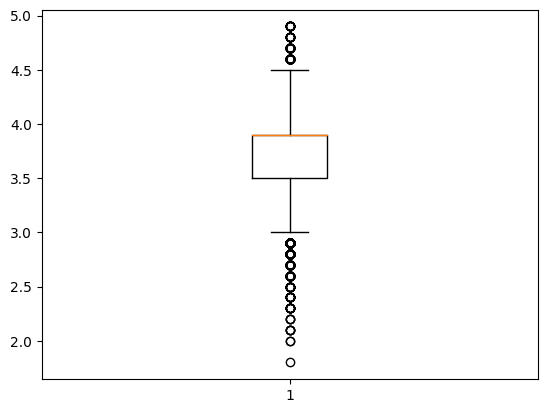

In [154]:
plt.boxplot(df['Rate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a3262944a8>,
 'caps': [<matplotlib.lines.Line2D at 0x2a3262a0c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a3262a07b8>],
 'medians': [<matplotlib.lines.Line2D at 0x2a3262b0588>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a3262b0860>],
 'means': []}

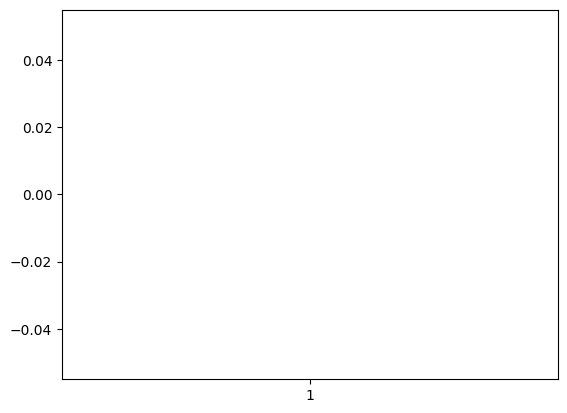

In [155]:
plt.boxplot(df['approx_cost(for two people)'])

In [31]:
test_df['online_order'] = test_df['online_order'].astype('category')

In [32]:
test_df.dtypes

name                             object
online_order                   category
book_table                       object
rate                            float64
votes                             int64
location                         object
rest_type                        object
dish_liked                        int64
cuisines                          int64
approx_cost(for two people)     float64
listed_in(type)                  object
listed_in(city)                  object
dtype: object

In [82]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

df.head()

,online_order,book_table,votes,dish_liked,cuisines,approx_cost(for two people),Rate
0,No,No,0,0,2,200.0,3.9
1,Yes,Yes,347,7,5,1000.0,4.0
2,No,No,9,0,2,400.0,3.4
3,Yes,No,33,0,2,200.0,3.9
4,Yes,No,142,7,3,450.0,3.1


In [101]:
df['book_table'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [164]:
def decode(value):
    try:
        if value == "Yes":
            return 1
        else:
            return 0
    except Exception as e:
        print(str(e))

In [127]:
df['online_order'] = df['online_order'].apply(decode)
df['book_table'] = df['book_table'].apply(decode)

obj = df.head()

In [104]:
y = df['Rate']

In [105]:
x = df.iloc[::,:-1]

In [106]:
x.head()

,online_order,book_table,votes,dish_liked,cuisines,approx_cost(for two people)
0,0,0,0,0,2,200.0
1,1,1,347,7,5,1000.0
2,0,0,9,0,2,400.0
3,1,0,33,0,2,200.0
4,1,0,142,7,3,450.0


In [107]:
from ctypes import c_void_p
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [108]:
x_train.head()

,online_order,book_table,votes,dish_liked,cuisines,approx_cost(for two people)
4035,1,1,1048,7,3,1600.0
7134,1,0,12,0,2,200.0
6586,1,0,48,1,2,400.0
1701,1,0,166,1,1,750.0
3885,1,0,120,4,3,150.0


In [109]:
x_test.head(3)

,online_order,book_table,votes,dish_liked,cuisines,approx_cost(for two people)
1190,1,0,328,7,5,450.0
9947,1,0,37,0,1,450.0
4001,0,0,0,0,2,150.0


In [110]:
y_test.head(3)

1190    3.8
9947    3.6
4001    3.9
Name: Rate, dtype: float64

In [111]:
y_train.head(3)

4035    4.3
7134    3.6
6586    3.9
Name: Rate, dtype: float64

In [124]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [123]:
y_predicted = rf.predict(x_test)

In [132]:
rf.score(x_test,y_predicted)

0.9890409752090709

In [128]:
import dill

with open('model.pkl','wb') as file:
    dill.dump(obj,file)

In [130]:
from Restaurant.util.util import *

model=load_object(r'D:\Restaurant_Rating_Prediction\notebook\model.pkl')

In [142]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10339     True
10340     True
10341     True
10342     True
10343    False
Length: 10344, dtype: bool

In [150]:
df

,online_order,book_table,rate,votes,dish_liked,cuisines,approx_cost(for two people)
0,No,No,3.9,0,NaN,"North Indian, Chinese",200.0
1,Yes,Yes,4.0,347,"Tandoori Chicken, Biryani, Paneer Tikka, Chick...","North Indian, Chinese, Thai, Mughlai, Seafood",1000.0
2,No,No,3.4,9,NaN,"South Indian, Chinese",400.0
3,Yes,No,3.9,33,NaN,"Bakery, Desserts",200.0
4,Yes,No,3.1,142,"Rava Idli, Tea, Coffee, Rava Dosa, Biryani, Ma...","North Indian, South Indian, Chinese",450.0
...,...,...,...,...,...,...,...
10339,Yes,No,3.9,0,NaN,"North Indian, Fast Food",450.0
10340,No,No,3.9,0,NaN,"Beverages, Fast Food",150.0
10341,No,No,3.0,33,"Pav Bhaji, Panipuri, Chaat","South Indian, Chinese, North Indian",400.0
10342,Yes,No,3.3,7,NaN,"Mithai, Street Food",150.0


In [151]:
df['online_order'].unique()

array(['No', 'Yes'], dtype=object)

In [152]:
df['book_table'].unique()

array(['No', 'Yes'], dtype=object)

In [156]:
df = df.drop_duplicates()

In [157]:
df.shape

(7323, 7)

In [163]:
df.head()

,online_order,book_table,rate,votes,dish_liked,cuisines,approx_cost(for two people)
0,No,0,3.9,0,NaN,"North Indian, Chinese",200.0
1,Yes,0,4.0,347,"Tandoori Chicken, Biryani, Paneer Tikka, Chick...","North Indian, Chinese, Thai, Mughlai, Seafood",1000.0
2,No,0,3.4,9,NaN,"South Indian, Chinese",400.0
3,Yes,0,3.9,33,NaN,"Bakery, Desserts",200.0
4,Yes,0,3.1,142,"Rava Idli, Tea, Coffee, Rava Dosa, Biryani, Ma...","North Indian, South Indian, Chinese",450.0


In [181]:
df = test_df.drop(['name','rest_type','location','listed_in(type)','listed_in(city)'],axis=1)

In [182]:
df = df.drop_duplicates()

In [183]:
df['book_table'].unique()

array(['No', 'Yes'], dtype=object)

In [184]:
df['book_table'] = df['book_table'].apply(decode)

In [185]:
df['online_order'] = df['online_order'].apply(decode)

In [186]:
df.shape

(7323, 7)

In [187]:
df['cuisines'] = df['cuisines'].apply(count)
df['dish_liked'] = df['dish_liked'].apply(count) 

In [188]:
df.head()

,online_order,book_table,rate,votes,dish_liked,cuisines,approx_cost(for two people)
0,0,0,3.9,0,0,2,200.0
1,1,1,4.0,347,7,5,1000.0
2,0,0,3.4,9,0,2,400.0
3,1,0,3.9,33,0,2,200.0
4,1,0,3.1,142,7,3,450.0


In [189]:
df['Rate'] = df['rate']

In [192]:
df = df.drop('rate',axis=1)

In [193]:
df

,online_order,book_table,votes,dish_liked,cuisines,approx_cost(for two people),Rate
0,0,0,0,0,2,200.0,3.9
1,1,1,347,7,5,1000.0,4.0
2,0,0,9,0,2,400.0,3.4
3,1,0,33,0,2,200.0,3.9
4,1,0,142,7,3,450.0,3.1
...,...,...,...,...,...,...,...
10334,1,0,94,2,2,400.0,3.7
10336,0,0,102,2,1,150.0,4.0
10337,1,1,1013,7,2,1100.0,4.5
10342,1,0,7,0,2,150.0,3.3
